#TAG SMART EMAIL  

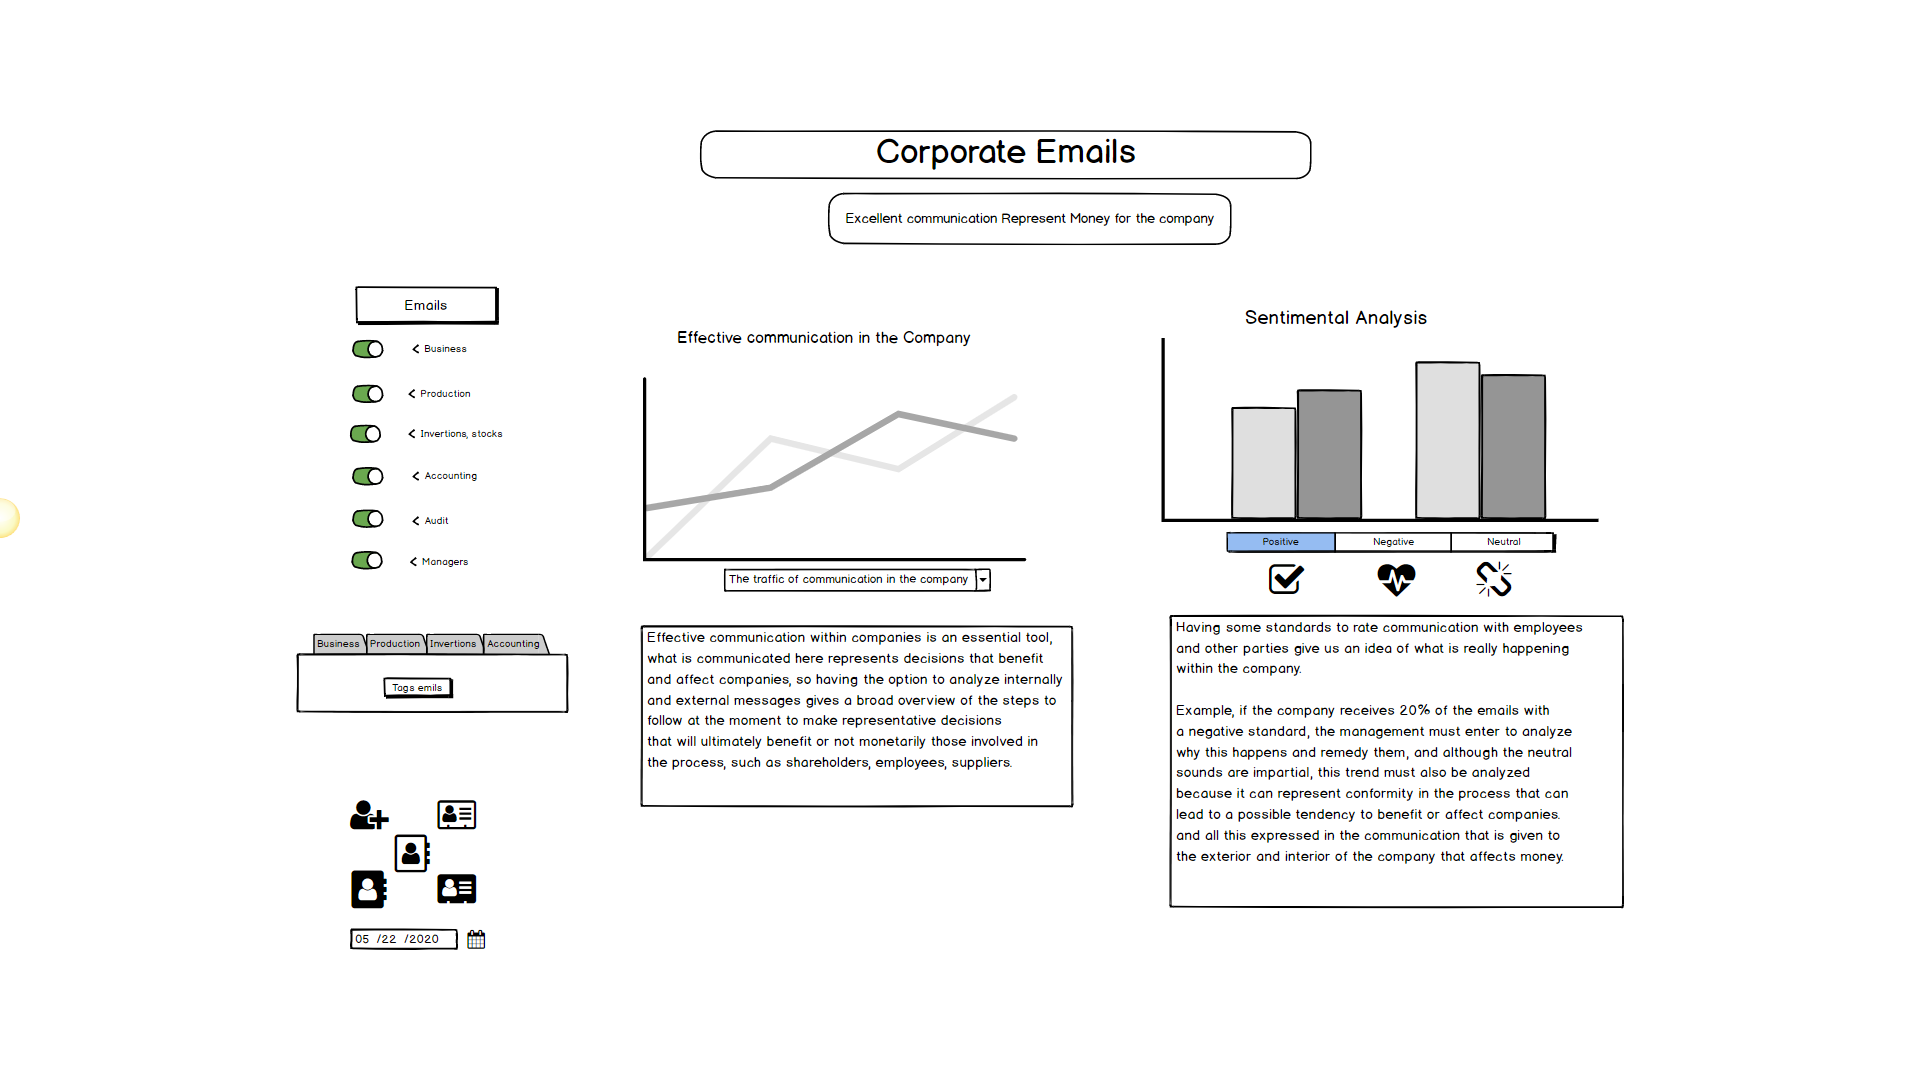

In [ ]:
from PIL import Image
# load the image
schema = Image.open('scheme.png')
schema

In [437]:
!pip install vaderSentiment

In [438]:
#import Library
import pandas as pd
import string
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [439]:
import requests
url = 'https://raw.githubusercontent.com/Moly-malibu/Tag-Smart-Emails/master/Enronemails.csv?token=AN2RW2GGHXCN4RRW3NT6C2S65KRHS'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

24004915

In [440]:
#EMAILS FROM ENRON COMPANY SAMPLING
df = pd.read_csv("email.csv").drop(['Unnamed: 0'], axis=1)
print(df.shape) 
df.head(7)

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...


In [441]:
 df.index

RangeIndex(start=0, stop=10000, step=1)

In [442]:
[s.strip() for s in df['message'][100].splitlines()]

['Message-ID: <15940494.1075855689309.JavaMail.evans@thyme>',
 'Date: Wed, 16 Aug 2000 05:35:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: cooper.richey@enron.com',
 'Subject: Re:',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Cooper Richey',
 'X-cc:',
 'X-bcc:',
 "X-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen.nsf',
 '',
 "I tried the new address but I don't have access.  also, what do I need to",
 'enter under domain?']

In [443]:
#Extracted the data and to create new columns

dates = ' '.join([s.strip() for s in df['message'][1].splitlines()][1:2])
from_who = ' '.join([s.strip('') for s in df['message'][1].splitlines()][2:3])
to_who = ' '.join([s.strip('') for s in df['message'][1].splitlines()][3:4])
emails = ' '.join([s.strip() for s in df['message'][1].splitlines()][15:])

In [444]:
#CLEAN DATASET
import re
import html
def cleanup_html(raw_html):
    clean_html = re.sub(r'<.*?>', '', raw_html)
    clean_html_http = re.sub(r'http\S+([\.]{3})?', '', clean_html)
    clean_txt = html.unescape(clean_html)
    return clean_txt
df['email_body'] = df['message'].apply(cleanup_html)

In [445]:
#Clean Data
def clean_email(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])
def clean_content_type(email):
    return ' '.join([s.strip() for s in email.splitlines()][6:7])
def clean_subject(email):
    return ' '.join([s.strip() for s in email.splitlines()][4:5])
def clean_to_who(email):
    return ' '.join([s.strip() for s in email.splitlines()][4:4])
def clean_from_who(email):
    return ' '.join([s.strip() for s in email.splitlines()][2:3])
def clean_dates(email):
    return ' '.join([s.strip() for s in email.splitlines()][1:2])

df['email_body'] = df['message'].apply(clean_email)
df['to_who'] = df['message'].apply(clean_to_who)
df['from_who'] = df['message'].apply(clean_from_who)
df['dates'] = df['message'].apply(clean_dates)
df["email_body"].value_counts(sort=True).head()

 most bullish thing at this point is moving closer to everyone's psychological $4 price target and that everybody and their dog is still short.  next sellers need to be from producer community.  saw a little this week with williams hedging the barrett transaction but wouldnt say thats indicative of the rest of the e&p community.  short covering rallies will get more common here.  velocity of move down has slowed significantly for good (except maybe in bid week).  my concern is if we go to $4 and people want to cover some shorts, who's selling it to them?  might feel a lot like it did when we were trying to break $5.    9
 Tim,  mike grigsby is having problems with accessing the west power site.  Can you please make sure he has an active password.  Thank you,  Phillip                                                                                                                                                                                                                               

In [446]:
df.sort_values(by='email_body', ascending=False).head(5)

,file,message,email_body,to_who,from_who,dates
9408,badeer-r/notes_inbox/62.,Message-ID: <22495830.1075863605235.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...,,From: bwoertz@caiso.com,"Date: Thu, 24 Aug 2000 10:40:00 -0700 (PDT)"
9165,badeer-r/discussion_threads/215.,Message-ID: <26362480.1075863601560.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...,,From: bwoertz@caiso.com,"Date: Thu, 24 Aug 2000 10:40:00 -0700 (PDT)"
8896,badeer-r/all_documents/62.,Message-ID: <9019069.1075863588438.JavaMail.ev...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...,,From: bwoertz@caiso.com,"Date: Thu, 24 Aug 2000 10:40:00 -0700 (PDT)"
8306,arora-h/inbox/69.,Message-ID: <20199224.1075862674172.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c...",,From: michael.mattox@enron.com,"Date: Thu, 15 Nov 2001 09:47:18 -0800 (PST)"
8087,arora-h/deleted_items/183.,Message-ID: <19460356.1075861397603.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c...",,From: michael.mattox@enron.com,"Date: Thu, 15 Nov 2001 09:47:18 -0800 (PST)"


In [447]:
#CLEAN DATA

#Str the data
df['email_body'] = df['email_body'].astype(str)

#remove whitespace
df['email_body'] = df['email_body'].str.strip().str.lower()

#Start with date
df['email_body'].str.match('\d?\d/\d?\d/\d{4}').all()

#\s indicates a white space. So [^\s] is any non-white space and includes letters, numbers, special characters
df['email_body'] = df['email_body'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

##Sentimental Analysis

In [448]:
#Vander model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

def vaderizeSentiment(sentence):
    return analyzer.polarity_scores(sentence)

In [449]:
#creared columns score with numbers
df['Scores'] = df['email_body'].apply(vaderizeSentiment)

In [450]:
#Create score by differente classification position into the text
df[['negative', 'neutral', 'positive', 'compound']] = df.Scores.apply(pd.Series)

In [451]:
#Topics by Score
for text in df.sort_values(by='neutral', ascending=False)['email_body'].head(5):
    print(f"------ Topic ------")
    print(text, end="\n")

------ Topic ------
here is our forecast
------ Topic ------
you and matt going to dallas this week
------ Topic ------
i still use this service
------ Topic ------
xbcc xfolder jarnold nonprivilegedarnold johndeleted items xorigin arnoldj xfilename jarnold nonprivilegedpst the report named ng price pl httptrvcorpenroncomlinkfromexcelaspreportcdreportnamengpriceplcategorycdcategorynamefinancialtochidestvtvexpycurrentefctdate published as of is now available for viewing on the website
------ Topic ------
xbcc xfolder jarnold nonprivilegedarnold johndeleted items xorigin arnoldj xfilename jarnold nonprivilegedpst the report named ng propt pl httptrvcorpenroncomlinkfromexcelaspreportcdreportnamengproptplcategorycdcategorynamefinancialtochidestvtvexpycurrentefctdate published as of is now available for viewing on the website


In [452]:
#Model to see final prediction
Model = SentimentIntensityAnalyzer()
def score(sentence, Model):
    return Model.polarity_scores(sentence)['compound']

# Sentiment score
df['final_score'] = df['email_body'].apply(lambda x: score(x, Model))

#Discretize variable.
df['final_pred'] = pd.cut(df['final_score'], bins=5, labels=[1, 2, 3, 4, 5])
df = df.drop('final_score', axis=1).sort_values(by=['file','final_pred']).iloc[:5]

In [453]:
#Pencentage in the classification.
df['final_pred'].value_counts(normalize=True) * 100

3    40.0
5    20.0
4    20.0
2    20.0
1     0.0
Name: final_pred, dtype: float64

In [454]:
df = df.drop(columns= ['file', 'message', 'Scores']) 

In [455]:
df

,email_body,to_who,from_who,dates,negative,neutral,positive,compound,final_pred
0,here is our forecast,,From: phillip.allen@enron.com,"Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)",0.000,1.000,0.000,0.0000,3
1,traveling to have a business meeting takes the...,,From: phillip.allen@enron.com,"Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)",0.000,0.893,0.107,0.9313,5
2,test successful way to go,,From: phillip.allen@enron.com,"Date: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",0.000,0.513,0.487,0.5859,4
3,randy can you send me a schedule of the salary...,,From: phillip.allen@enron.com,"Date: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0.000,1.000,0.000,0.0000,3
4,lets shoot for tuesday at,,From: phillip.allen@enron.com,"Date: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",0.375,0.625,0.000,-0.3400,2


##Random Forest Classifier

In [ ]:
#Data Merge from KNN and LDA
import requests
url = 'https://raw.githubusercontent.com/Lambda-School-Labs/tagger-ds/master/notebooks/merged_data_for_KNN_with_body.csv'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

29340319

In [389]:
import pandas as pd

df = pd.read_csv("email.csv").drop(columns = ['email_body','subject', 
                                              'content_type', 'to_who', 'from_who', 'dates',
                                              'negative', 'positive', 'compound', 'neutral',
                                              'negative.1', 'neutral.1', 'positive.1', 'compound.1',
                                              'final_pred.1', 'message_id', 'user_tags', 'thread_id' 
                                               ])

In [ ]:
# Feature / target split
X = df['smart_tags']
y = df['final_pred']

In [ ]:
# Do a train / test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((7500,), (7500,), (2500,), (2500,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import spacy

nlp = spacy.load('en_core_web_sm')

# Vectorize
def embed(docs):
    return [nlp(doc).vector for doc in docs]

# model
classifier = RandomForestClassifier(n_estimators=100, random_state=107,
                                   max_depth=7)
# Fit the model on training data
classifier.fit(embed(X_train), y_train)

# Get predictions
pred = classifier.predict(embed(X_test))

In [ ]:
classifier.score(embed(X_test), y_test)

0.7476

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Singular value decomposition
svd = TruncatedSVD(n_components=100, # Just here for demo. 
                   algorithm='randomized',
                   n_iter=10)


# LSI: Latent semantic indexing
lsi = Pipeline([('vect', vect), ('svd', svd)])

In [ ]:
from sklearn.model_selection import GridSearchCV
# Pipeline
pipe = Pipeline([
                 #Vectorrizer
                 ('vect', vect),
                 #Classifier
                 ('clf', rfc)
                ])

In [ ]:
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [ ]:
accuracy = grid_search.best_score_

In [ ]:
accuracy

0.8338666666666666

##Graphics Sentimental Analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


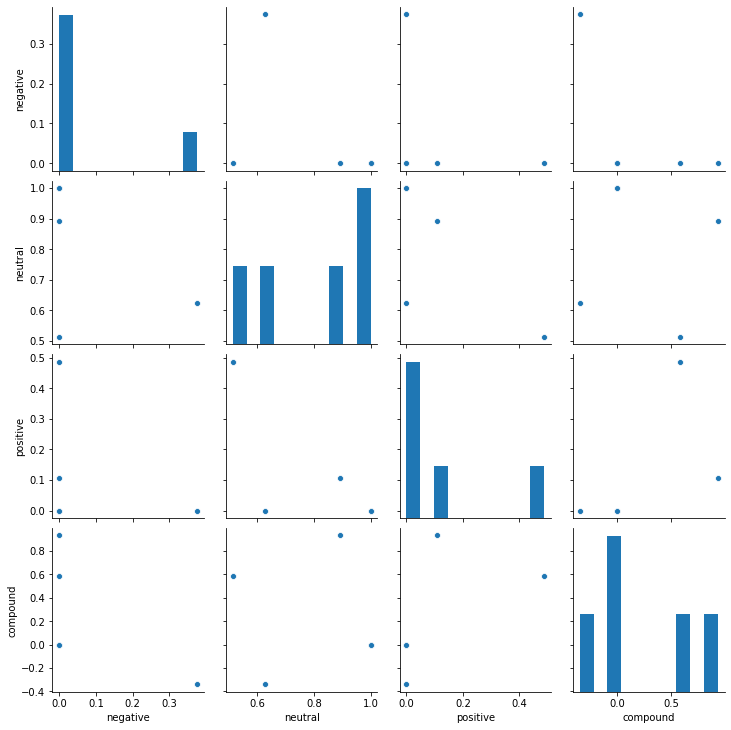

In [ ]:
import seaborn as sns
sns.pairplot(df[['negative', 'neutral', 'positive', 'compound']]);

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='final_pred', template='plotly_white', title='Email Sentimental Analysis')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Emails Tendence')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=['negative', 'neutral', 'positive', 'compound']))
fig.show()

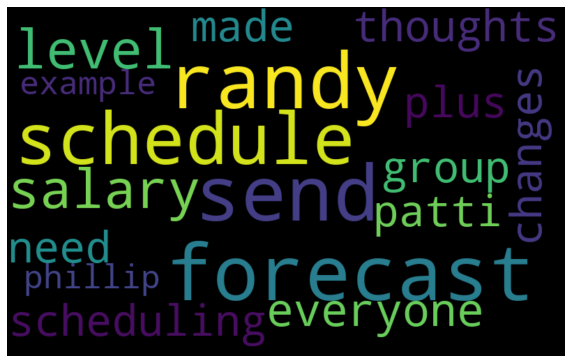

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in df['email_body'][df['neutral'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

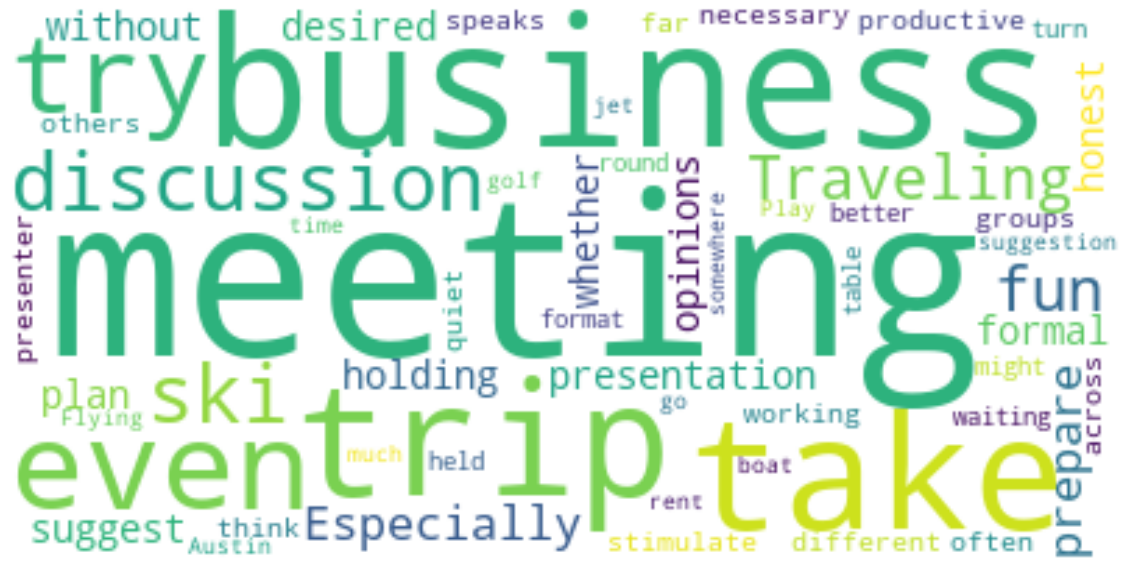

In [ ]:
wordcloud_spam = WordCloud(background_color="white").generate(emails)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()